# SeedlessProcrustes
SeedlessProcrustes aligns two datasets via an iterative algorithm that alternates optimal transport and regular procrustes.
It can be used in the settings where the two datasets do not have the same number of entries. It is also applicable in datasets with same shapes. Here's two examples of aligning two datasets using SeedlessProcrustes. For more information, see [reference](https://graspy.neurodata.io/reference/align.html)

In [19]:
import graspologic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

%matplotlib inline

First, intruduce two datasets with the same entries.

In [20]:
np.random.seed(2)
X = np.random.rand(10,2)
Y = np.random.rand(10,2)
Z = special_ortho_group.rvs(2)
Y = Y@Z

Then use SeedlessProcrustes to get the transformed dataset, X_prime_Seedless.

In [15]:
from graspologic.align import SeedlessProcrustes
X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_SeedlessProcrustes. Plot X, Y, X@Q_SeedlessProcrustes

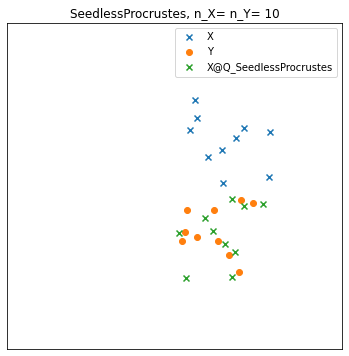

In [16]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, n_X= n_Y= 10")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y")
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", marker='x')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Here, we introduce np.linlg.norm to calculate the Frobenius norm of (X_prime - Y), for quantificaion of the aligning ability in this example.

In [17]:
norm_Seedless = np.linalg.norm(X_prime_Seedless - Y)
print(norm_Seedless)

1.4440225613731288


We can also apply SeedlessProcrustes on two datasets X,Y with different entries.

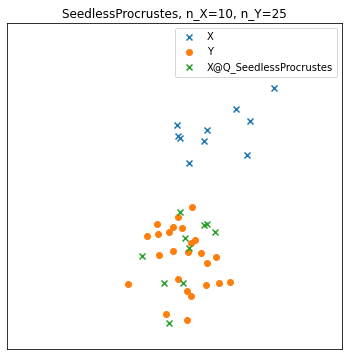

In [18]:
np.random.seed(3)
X = np.random.rand(10,2)
Y = np.random.rand(25,2)
Z = special_ortho_group.rvs(2)
Y = Y@Z

X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)

plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, n_X=10, n_Y=25")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y")
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", marker='x')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();